# <span style="color:#0b486b"> Data Visualisation </span>

In [10]:
# import the necessary libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pymongo import MongoClient
from time import sleep
from IPython.display import display, clear_output
import time
import folium

# Connect to MongoDB
host_ip = "192.168.0.116"
client = MongoClient(host_ip, 27017)
db = client.fit3182_a2_db




<h1> Part 1: Joined Streaming Visualisation Graph </h1>

<h2>Overview</h2>

This section contains a dual-plot graph to visualize the joined streaming data between all the camera events. This dual-plot visualization provides a dynamic, time-series analysis of traffic violations, displaying hourly aggregated violation counts alongside the mean speed of these violations. Its primary purpose is to enable the identification of temporal patterns, trends, and anomalies in speeding behavior, thereby supporting informed decision-making for traffic management and safety interventions.


<h2>Plot Description and Features</h2>

<h3>Plot 1: Violations vs Arrival Time (Top Plot)</h3>

<p><b>Content: </b>Displays the total count if all recorded speeding violations (both instantaneous and average speed violations) aggregated into hourly bins on their timestamp_end.</p>


<p><b><font color='blue'>Key Features and Importance: </font></b></p>

<p><b>Mininum and Maximum Annotations</b></p>
<p>Clearly highlight the hours with the lowest and highest with the current information received. This allows for quick identification of peak and off-peak periods of non-compliance. This is crucial for understanding when violations are most and least common.</p>

<p><b>Average Violations Count Line</b></p>
<p>Provides a baseline across the observed period, helping to contextualize whether current hourly counts are above or below the typical level.</p>

<p><b>Spike and High Difference Shading</b></p>
<p>These visual cues are critical for immediately drawing attention to hours where there's a sudden and significant surge in violations compared to the previous hour. This indicates periods of rapidly deteriorating compliance or unusual traffic events.
    <font color='green'>Green</font> represents a spike in violation in the graph while <font color='red'>Red</font> represents of a drop in violation count
</p>


<h3>Plot 2: Average Speed vs Arrival Time (Bottom Plot)</h3>

<p><b>Content:</b> Displays the <i>average speed</i> of all recorded violations within each hourly time bin. Time bins with no violations are omitted from the speed line to reflect the absence of speed data, resulting in gaps where appropriate.</p>

<p><b><font color='blue'>Key Features and Importance: </font></b></p>



<p><b>Mininum and Maximum Annotations</b></p>
<p>Indicate the hourly bins where the average speed of violators was at its lowest and highest, providing insight into the range  of speeding incidents over time.</p>

<p><b>Average Speed line</b></p>
<p>Illustrates the typical mean speed of violations, offering a benchmark for the general severity of speeding.</p>

<p><b>90th Percentile Speed Line</b></p>
<p>This is a vital indicator of more extreme speeding behavior. It highlights the speed which 90% of the hourly average violation speeds fall below, thus drawing attention to the top 10% of most severe hourly speeding averages. This helps differentiate between generally higher speeds and exceptionally high-risk speeding periods.</p>


<p><b>30th Percentile Speed Line</b></p>
<p>This line highlights the speed below which 30% of the hourly average violation speeds fall. It serves as a useful lower-bound reference for identifying periods of relatively moderate speeding. By comparing it against the median or 90th percentile, analysts can better understand the distribution of speeding severity and detect shifts in driver behavior toward more cautious or aggressive patterns.</p>




    
   


<h2>Connecting Patterns across both plots and discussing implications</h2>


 
<b>High Violation Count and High Violation Speed</b>

If the data shows high violations (plot 1) while high violation speed (plot 2, potentially exceeding the 90th percentile). This could imply significant risk as these events are severe for the safety of road users. This pattern might suggest widespread aggressive driving or conditions where drivers feel emboldened to speed excessively, warranting urgent attention.


<b>High Violation Count and Moderate/Low Average Violation Speed</b>

A high number of violations (Plot 1) paired with an average violator speed that is only moderately above the limit (Plot 2) could imply widespread, but less severe, non-compliance. The implication here might be less about overtly reckless individuals and more about systemic issues like unclear speed limits, road design encouraging slightly higher speeds, or a general underestimation of speed by many drivers. For example, during the start of rush hour or the end of rush hour, where more vehicles are more eager to speed modestly to "beat the traffic" to get home quicker. However, the presence of other vehicles (even if not yet fully congested) might naturally temper the average speed of those violating from becoming excessively high. There's less opportunity for extreme speeding compared to an empty road.

<b>Low violations Count and high violation speed</b>


If violation counts are low (Plot 1) but the average speed of these few violators is exceptionally high (Plot 2), this points towards isolated incidents of extreme speeding. The implication is a different risk profile – fewer offenders, but those who offend do so at dangerously high speeds, suggesting a need for targeted enforcement against high-risk individuals. For example, extreme speeding commonly occurs around midnight due to lack of enforcement and low traffic on freeways.


<b>How Spikes and Drops in violation affect</b>

A noticeable drop in violation count (Plot 1) often coincides with a *gap* in average speed (Plot 2). This suggests either a temporary absence of incoming vehicles or a general adherence to speed limits during that period. Such trends may reflect low traffic volume, offering valuable insight into traffic behavior and enforcement effectiveness.


These connected patterns allow authorities to move beyond simply counting violations to understanding the nature and potential severity of speeding behaviors at different times. This nuanced understanding has direct implications for tailoring enforcement strategies, public awareness campaigns, and road safety engineering efforts. For example, widespread minor speeding might call for educational campaigns or traffic calming measures, while isolated extreme speeding might necessitate targeted patrols.






## Operational Decisions and Triggering Alerts

**Overview**

The dual-plot visualization not only presents violation data effectively but also incorporates dynamic annotations and statistical indicators that support **real-time operational insights** and the potential for **automated alerts**. These features elevate the dashboard from a static report to a responsive decision-support tool.



The clear temporal breakdown of **violation counts** and **average speeds** enables traffic authorities to make **data-driven enforcement and planning decisions**. Key use cases include:

- **High Violation Count Hours:**  
  When violation counts are consistently high,especially if paired with average speeds exceeding the 90th percentile,it signals areas of **elevated risk**, justifying the deployment of mobile speed cameras, increased patrol frequency, or temporary signage.

- **Spike Annotations:**  
  Green-shaded regions, which denote sudden spikes in violations, may correspond to **temporary environmental or behavioral changes** such as construction detours, weather impacts, or bottlenecks. These should be flagged for operational review.

- **Speeding Trends:**  
  Visual references such as the **average speed line** and **90th percentile line** allow authorities to distinguish between **routine low-level non-compliance** and **extreme speeding events**, which may require distinct intervention strategies.

The inclusion of these elements supports **adaptive traffic management**, enabling response strategies that are informed by the latest real-time trends and historic baselines.

### Critical Evaluation

This visualization goes beyond descriptive analytics to support **actions plans**. It does this through:

- Real-time annotations of violations and speeds, including **min/max labels**.
- **Baseline indicators** (average and 90th percentile) that contextualize observed values.
- **Shaded regions** that draw immediate attention to **critical changes** in violation behavior.
- Automatic **time interpolation**, ensuring even low-activity periods are visually represented for consistent monitoring.

These visual cues are more than informative—they are **operational triggers**. For example, a spike shaded in green combined with a speed above the 90th percentile could be configured to **automatically alert enforcement teams**. Similarly, a sudden drop in violations may indicate **reduced traffic flow** or **sensor malfunction**, prompting system diagnostics.

In conclusion, the visualization is not only insightful but also actionable, by demonstrating how **visual features directly support operational decisions and proactive alerting** in a traffic management context.



## Future Work

Future enhancements could include integrating external data sources such as weather, events, or roadworks to better explain anomalies in violation patterns. Implementing automated anomaly detection models could provide real-time alerts for unusual spikes in speed or count. Segmenting violations by type (instantaneous vs. average) may offer clearer behavioral insights, while comparing trends across multiple days or weeks could uncover recurring patterns. Visual markers indicating enforcement changes (e.g., patrols or camera adjustments) would support intervention analysis. Lastly, adding user-defined filters and thresholds would make the tool more adaptable for diverse operational contexts.













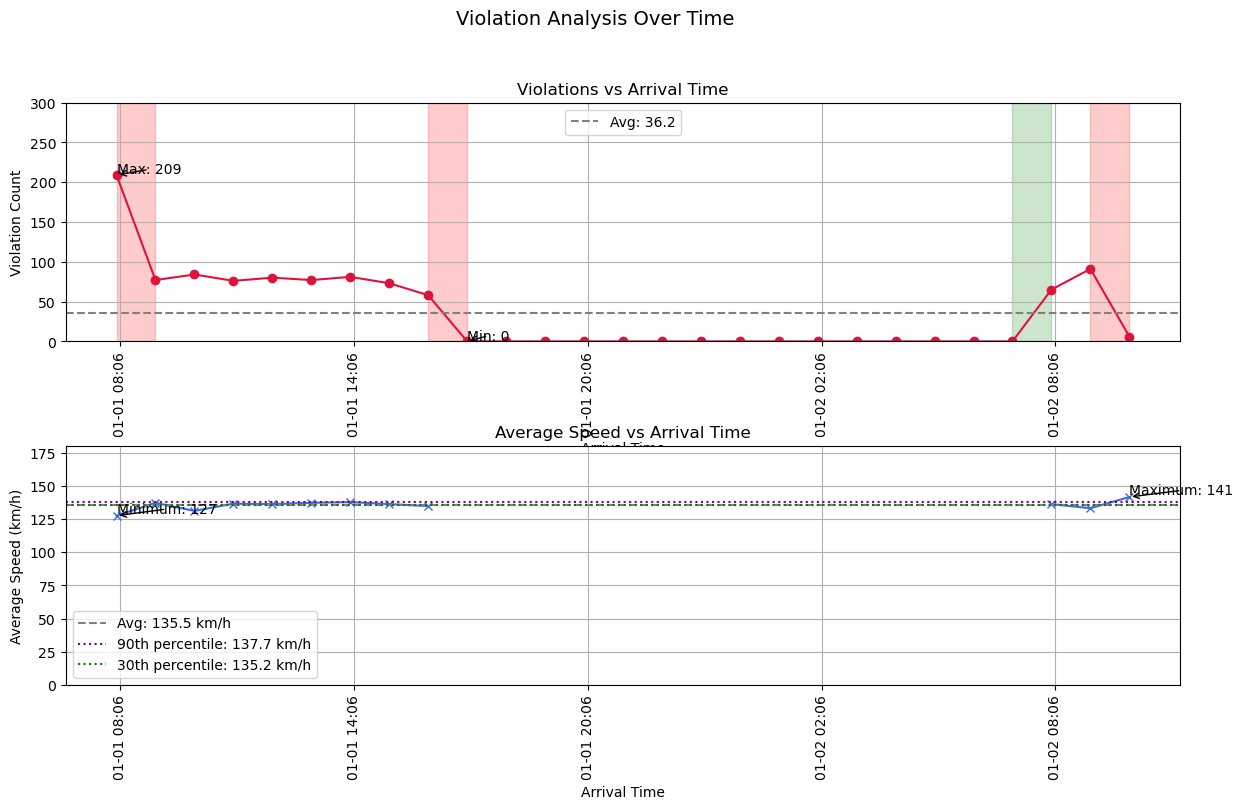

KeyboardInterrupt: 

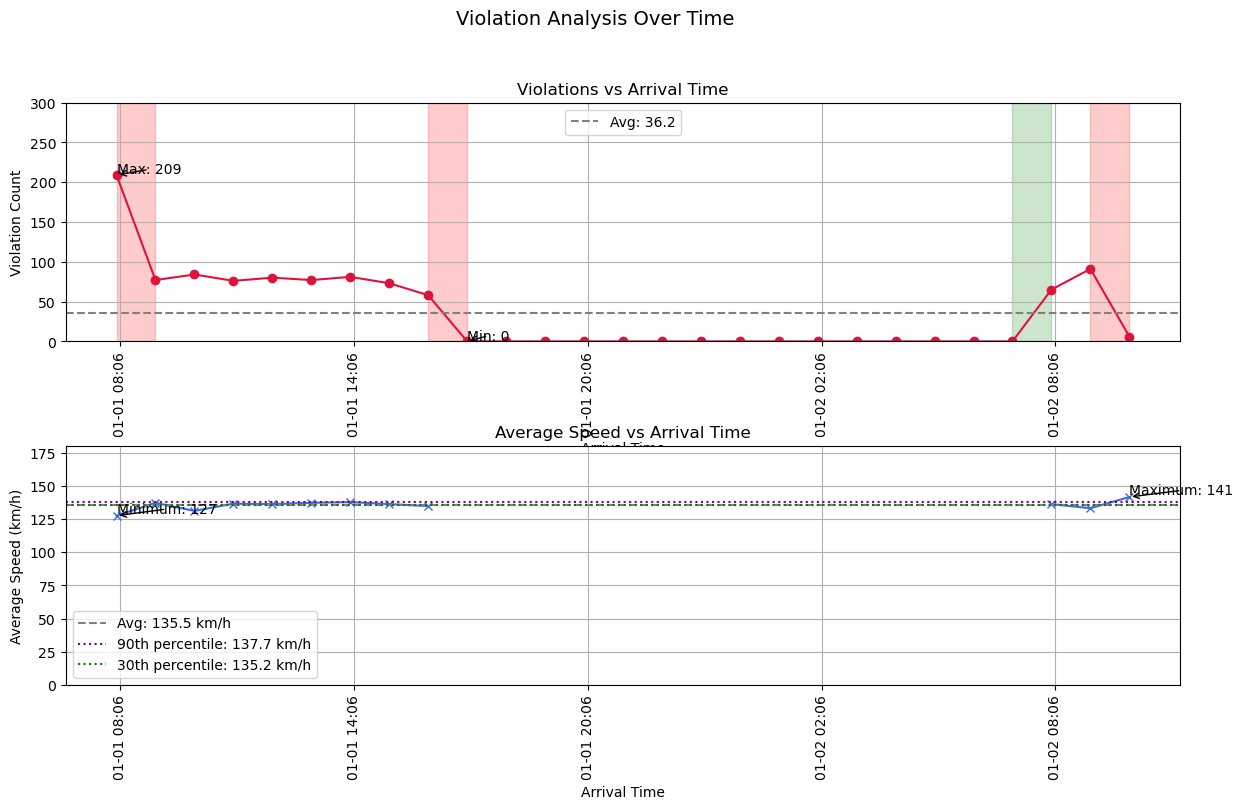

In [11]:
def init_dual_plots(interval_minutes=1):
    """
    
    Initializes a dual-panel matplotlib figure for visualizing traffic violation trends.

    The top subplot shows the number of violations over time, while the bottom subplot
    displays the average speed of violations within each time interval.

    Args:
        interval_minutes (int, optional): The interval in minutes used to set the spacing
            of ticks along the x-axis. Defaults to 1.

    Returns:
        tuple: A tuple containing:
            - fig (matplotlib.figure.Figure): The overall figure object.
            - axs (np.ndarray): An array of two subplot Axes:
                - axs[0]: Violation count vs. arrival time.
                - axs[1]: Average speed vs. arrival time.
    """
    
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))
    fig.suptitle("Violation Analysis Over Time", fontsize=14)

    time_formatter = mdates.DateFormatter('%H:%M')
    time_locator = mdates.MinuteLocator(interval=interval_minutes) # configure the ticks between the x axis 

    for ax, ylabel in zip(axs, ["Violation Count", "Average Speed (km/h)"]):
        ax.set_xlabel("Arrival Time")
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.xaxis.set_major_formatter(time_formatter)
        ax.xaxis.set_major_locator(time_locator)
        ax.tick_params(axis='x', rotation=90)

    axs[0].set_title("Violations vs Arrival Time")
    axs[0].set_ylim(0, 300)

    axs[1].set_title("Average Speed vs Arrival Time")
    axs[1].set_ylim(0, 180)
    plt.subplots_adjust(hspace=1,bottom=0.8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig, axs

def plot_graph(fig,axs):
    
    """
    Updates and renders dual time-series plots for traffic violation data.

    This function clears and redraws two subplots:
    - The top plot shows the hourly violation count over time.
    - The bottom plot displays the average speed of violations per hour, with gaps for periods where no violations occurred.

    It connects to a MongoDB database, retrieves violation records, bins them into hourly intervals,
    and computes aggregated metrics. It also applies visual enhancements including:
    - Dynamic x-axis tick intervals based on time range
    - Annotations for max/min values and average lines
    - Shaded regions highlighting significant spikes or drops in violations
    - Percentile lines for speed distribution analysis

    Args:
        fig (matplotlib.figure.Figure): The figure object containing the plots.
        axs (np.ndarray): An array of two AxesSubplot objects corresponding to:
            axs[0] - Violation count vs. arrival time
            axs[1] - Average speed vs. arrival time

    Returns:
        None

    Notes:
        - `grouped['speed_reading']` is not filled for missing hours to preserve the accuracy of average speed calculations.
        - Gaps in the speed line indicate time intervals with no vehicle data.
        - The violation count is zero-filled to reflect accurate frequency data across time bins.
    """
    
    axs[0].clear()
    axs[1].clear()
    
    
    violations_db = db.violations

    # Load data from MongoDB into a DataFrame
    violations_pd = pd.DataFrame(list(violations_db.find()))

    if violations_pd.empty:
        print("No data found in violations collection.")
        return

    # Convert timestamp to datetime
    violations_pd['timestamp_end'] = pd.to_datetime(violations_pd['timestamp_end'])
    violations_pd['time_bin'] = violations_pd['timestamp_end'].dt.floor('1H') # round down the nearest min
    
    
    # Group by the bins specified
    # Gor
    grouped = violations_pd.groupby('time_bin').agg({
        'speed_reading': 'mean', # get the mean
        'timestamp_end': 'count' # get the all the timstamps which fall under the same time_bin and that would be the number of violations in the time_bin
    }).rename(columns={'timestamp_end': 'violation_count'})


    if grouped.empty:
        print("No data available after grouping.")
        return
    
    
### APPLY FILTER COMMENT OUT IF NOT NEEDED
#     # Define time range (modify these as needed)
#     start_filter = pd.to_datetime("2024-01-01 13:00:00")
#     end_filter = pd.to_datetime("2024-01-01 15:00:00")

#     # Apply filter to the grouped DataFrame
#     grouped = grouped.loc[(grouped.index >= start_filter) & (grouped.index <= end_filter)]
    

    # transform timestamps which have no violation count
    if not grouped.empty:
        # create a complete sequence of hourly timestamps that spans the entire period covered by your existing grouped data.
        full_time_range = pd.date_range(start=grouped.index.min(), end=grouped.index.max(), freq='H')
        # ensure that every hour within the full time range has a row even with hours which have no violation count
        grouped = grouped.reindex(full_time_range) # Reindex the DataFrame to include all hours
        # insert 0 with null values of the violation_count column on newly created rows
        grouped['violation_count'] = grouped['violation_count'].fillna(0).astype(int)
        

    # Calculate dynamic interval for x-axis locator
    start_time = grouped.index.min()
    end_time = grouped.index.max()
    total_hours = (end_time - start_time).total_seconds() / 3600.0 # Since bins are hourly

    dynamic_locator_interval_minutes = 60 # Default to hourly ticks
    if total_hours <= 0:
        dynamic_locator_interval_minutes = 60 
    elif total_hours <= 6: # Up to 6 hours, tick every hour
        dynamic_locator_interval_minutes = 60
    elif total_hours <= 12: # Up to 12 hours, tick every 2 hours
        dynamic_locator_interval_minutes = 120
    elif total_hours <= 24: # Up to 24 hours, tick every 4 hours
        dynamic_locator_interval_minutes = 240
    else: # More than 24 hours, tick every 6 hours
        dynamic_locator_interval_minutes = 360
        
    print(dynamic_locator_interval_minutes)

    # Re-apply formatting to axes
    time_formatter = mdates.DateFormatter('%m-%d %H:%M')
    time_locator = mdates.MinuteLocator(interval=dynamic_locator_interval_minutes)

    for ax, ylabel in zip(axs, ["Violation Count", "Average Speed (km/h)"]):
        ax.set_xlabel("Arrival Time")
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.xaxis.set_major_formatter(time_formatter)
        ax.xaxis.set_major_locator(time_locator)
        ax.tick_params(axis='x', rotation=90)

    axs[0].set_title("Violations vs Arrival Time")
    axs[0].set_ylim(0, 300) # User defined limit

    axs[1].set_title("Average Speed vs Arrival Time")
    axs[1].set_ylim(0, 180) # User defined limit


    # Plot data
    axs[0].plot(grouped.index, grouped['violation_count'], marker='o', color='crimson')# Plotting the grouped time intervals on the x-axis and the number of violations per interval on the y-axis
    axs[1].plot(grouped.index, grouped['speed_reading'], marker='x', color='royalblue')

    # Annotate max violation count
    max_violation_time = grouped['violation_count'].idxmax()
    max_violation_value = grouped['violation_count'].max()
    axs[0].annotate(f'Max: {max_violation_value}',
                    xy=(max_violation_time, max_violation_value),
                    xytext=(max_violation_time, max_violation_value + 2),
                    arrowprops=dict(facecolor='red', arrowstyle='->'))
    
    # Annotate the min violation count
    min_violation_time = grouped['violation_count'].idxmin()
    min_violation_value = grouped['violation_count'].min()
    axs[0].annotate(f'Min: {min_violation_value}',
                    xy=(min_violation_time, min_violation_value),
                    xytext=(min_violation_time, min_violation_value + 2),
                    arrowprops=dict(facecolor='red', arrowstyle='->'))
    
    # Annotate the average violation count over the entire period so far
    avg_violations = grouped['violation_count'].mean()
    axs[0].axhline(avg_violations, color='gray', linestyle='--', label=f'Avg: {avg_violations:.1f}')
    
    axs[0].legend()
    
    
    
    # Annotate lowest speed violation
    min_speed_time = grouped['speed_reading'].idxmin() # get the lowest time
    min_speed_value = grouped['speed_reading'].min() # get the lowest value
    axs[1].annotate(f'Minimum: {int(min_speed_value)}',
                    xy=(min_speed_time, min_speed_value),
                    xytext=(min_speed_time, min_speed_value + 2),
                    arrowprops=dict(facecolor='purple', arrowstyle='->'))
    
    
    # Annotate the highest speed violation
    max_speed_time = grouped['speed_reading'].idxmax() # get the lowest time
    max_speed_value = grouped['speed_reading'].max() # get the lowest value
    axs[1].annotate(f'Maximum: {int(max_speed_value)}',
                    xy=(max_speed_time, max_speed_value),
                    xytext=(max_speed_time, max_speed_value + 2),
                    arrowprops=dict(facecolor='purple', arrowstyle='->'))
    
    
    # find drops or spikes
    grouped['violation_diff'] = grouped['violation_count'].diff() # find the difference between consecutive rows of violation_count column
    
    
    # Shaded region for drops
    drops = grouped[grouped['violation_diff'] < -30] 
    for time_bin_val in drops.index:
        if isinstance(time_bin_val, pd.Timestamp):
            axs[0].axvspan(time_bin_val, time_bin_val - pd.Timedelta(hours=1), color='red', alpha=0.2, label='_nolegend_')
        
    # Shaded region for spikes
    spikes = grouped[grouped['violation_diff'] > 30] # when there is a drop in violation
    for time_bin_val in spikes.index:
        if isinstance(time_bin_val, pd.Timestamp):
            axs[0].axvspan(time_bin_val, time_bin_val - pd.Timedelta(hours=1), color='green', alpha=0.2)
    
    

    # Draw average speed line
    avg_speed = grouped['speed_reading'].mean()
    axs[1].axhline(avg_speed, color='gray', linestyle='--', label=f'Avg: {avg_speed:.1f} km/h')
    
    
    # Draw the 90th percentile
    percentile_90 = grouped["speed_reading"].quantile(0.9)
    axs[1].axhline(percentile_90, color='purple', linestyle=':', label=f'90th percentile: {percentile_90:.1f} km/h')
    axs[1].legend()
    
    # Draw the 30th percentile
    percentile_30 = grouped["speed_reading"].quantile(0.3)
    axs[1].axhline(percentile_30, color='green', linestyle=':', label=f'30th percentile: {percentile_30:.1f} km/h')
    axs[1].legend()
    
    


# Initialise the plots
fig, axs = init_dual_plots(interval_minutes=200)
# Ensure that we get the lastest data from mongoDB
while True:  
    plot_graph(fig,axs)
    clear_output(wait = True)
    display(fig)
    time.sleep(5)



<h1>Part 2: Map Visualisation</h1>

<h2>Overview</h2>

This static map visualization offers a complementary spatial perspective to the time-series graph by rendering filtered traffic violation data within a specific time window. By incorporating camera geolocations and aggregated violation statistics (both instantaneous and average speed), the map provides actionable insights into spatial non-compliance patterns.This approach emphasizes filtered snapshot analysis, which enables investigators to focus on specific windows of interest, such as rush hours or late-night intervals.

<h2>Map Description and Features</h2>

<h3>Instantaneous Violations (Circle Markers)</h3>

<p><b>Content: </b>Each camera location is marked with a colored circle, representing the total number of instantaneous speed violations within the selected filter window (e.g., between 08:00 and 09:00 on a specific day or a span of multiple days).</p>


<p><b><font color='blue'>Key Features and Importance: </font></b></p>

<p><b>Color coded Markers based on Violation Count</b></p>
<p>The marker color ranges from blue (low count) to orange and red (high count), simulating a heatmap-like effect. This makes it easy to visually identify hotspots of speeding behavior without relying on time playback.y</p>



<p><b>Popup with Camera ID and Violation Count:</b></p>

<p>Each marker includes a popup showing the specific camera ID and the number of violations during the selected time window. This supports fine-grained, location-specific analysis for operational planning (e.g., camera recalibration, on-site signage).</p>

<p><b>Total Violations Displayed Regardless of Filter:</b></p>
<p>In addition to filtered counts, the popups include total violation statistics across the entire dataset. This enables temporal comparison — analysts can see whether a spike or drop in the filtered window is typical or abnormal for that camera.</p>



<h3>Average Speed Violations (Polylines)</h3>

<b>Content</b>
Routes between consecutive cameras are drawn as polylines, with line thickness and color encoding the number of average speed violations detected along those paths.

<font color='blue'>Key Features and Importance:</font>

<b>Color-Graded Lines Reflecting Violation Volume: </b>
<p>Gray, purple, and red are used to visually represent low, moderate, and high average-speed violations, respectively. This visual coding highlights which road segments between checkpoints are most frequently abused.</p>

<b>Line Thickness Scaling with Violation Count: </b>
<p>Thicker lines represent routes with a higher number of filtered violations, making severity intuitively clear.</p>

<b>Tooltip Showing Both Filtered and Cumulative Violations: </b>
<p>Hovering over any line reveals the violation count for the current window and the total historical average violations along that route. This dual insight allows observers to contextualize whether the filtered snapshot aligns with long-term trends or is an anomaly.</p>

<b>Tooltip Displaying Violations within and between Cameras</b>
<p>This popup displays a detailed summary of vehicles that exceeded the speed limit within the selected time window for each camera. It includes the car plate, rounded speed reading, and the timestamp of each violation. If more than 10 violations are recorded, the popup indicates how many additional records exist beyond those shown. This can be adjusted</p>






<h3><b>Operational Usefulness:</b></h3>

<p>Traffic authorities can use the visual cues to determine where enforcement deployment (e.g., mobile patrols, signage) is most needed.</p>

Camera effectiveness and coverage gaps become visible by comparing low-activity vs. high-activity areas.

The presence of both filtered and total stats encourages temporal benchmarking whereby users can assess whether behavior in the filtered window is within normal range or indicates a sudden surge in risky driving.


<h3><b>Future Extensions:</b></h3>

<p>To further enhance this static map, future iterations could incorporate an hourly slider filter to enable comparison across time windows. This makes it easier to detect trends or shifts in violation patterns. Additionally, integrating other data sources such as weather conditions or scheduled events (e.g public holidays) can help unexpected spikes in violations, providing richer insights based on deeper contextual insights, same suggestion as mentioned in Part 1. For scalability, especially in larger networks with many cameras, implementing violation density contours or cluster-based aggregation would improve visual clarity and allow for more effective high-level monitoring.
    

  
    













In [14]:
import folium
import pandas as pd
from pymongo import MongoClient
from datetime import datetime
import json

# Connect to MongoDB
host_ip = "192.168.0.116"
client = MongoClient(host_ip, 27017)
db = client.fit3182_a2_db

# Load camera data
cameras_db = db.camera
cameras_list = list(cameras_db.find())
sorted_cameras = sorted(cameras_list, key=lambda cam: cam['position'])


# Load violation data
violations_db = db.violations
violations_pd = pd.DataFrame(list(violations_db.find()))

# Parse timestamps
violations_pd['timestamp_end'] = pd.to_datetime(violations_pd['timestamp_end'])

all_violations_pd = violations_pd

# ### APPLY FILTER # comment out if not needed # yyy-mm-dd
start_filter = pd.to_datetime("2024-01-01 08:00:00")
end_filter = pd.to_datetime("2024-01-02 00:00:00")
violations_pd = violations_pd[(violations_pd['timestamp_end'] >= start_filter) & (violations_pd['timestamp_end'] <= end_filter)]

# print("####ALL THE VIOLATIONS####")
# print(violations_pd)

# Group for popup stats
grouped = violations_pd.groupby([
    'camera_id_start', 'camera_id_end', 'violation_type']
).agg({'violation_type': 'count'}).rename(columns={'violation_type': 'violation_count'}).reset_index()


instantaneous_group = grouped[grouped['violation_type'] == 'instantaneous']
average_group = grouped[grouped['violation_type'] == 'average']


# Lookup dictionaries
instantaneous_counts = instantaneous_group.set_index('camera_id_start')['violation_count'].to_dict()
average_counts = average_group.set_index(['camera_id_start', 'camera_id_end'])['violation_count'].to_dict()


# Init map
first_cam = sorted_cameras[0]
fomap = folium.Map(location=[float(first_cam['latitude']), float(first_cam['longitude'])], zoom_start=15)


# Add camera markers with violation counts
camera_coords = []
camera_id_sequence = []
for cam in sorted_cameras:
    lat = float(cam['latitude'])
    lon = float(cam['longitude'])
    cam_id = int(cam['camera_id'])
    speed_limit = float(cam['speed_limit'])
    inst_count = instantaneous_counts.get(cam_id, 0)
    
    # get the total number of instantaneous violation for each camera without time filter
    total_instantaneous_violations = (
        (all_violations_pd['violation_type'] == 'instantaneous') &
        (all_violations_pd['camera_id_start'] == cam_id)
    ).sum()


    camera_coords.append((lat, lon))
    camera_id_sequence.append(cam_id)
    

    popup_text = f"Camera {cam_id}<br>Total Instantaneous Violations: {total_instantaneous_violations}<br>Speed Limit: {speed_limit}km/h"

    folium.Marker(
        location=(lat, lon),
        popup=folium.Popup(popup_text, max_width=250),
        icon=folium.Icon(color='blue', icon='camera')
    ).add_to(fomap)


# Filter violations table based on the violation type
inst_data = violations_pd[violations_pd['violation_type'] == 'instantaneous']
avg_data = violations_pd[violations_pd['violation_type'] == 'average']

# Group by operation to get the number of violations for line between 2 cameras
counts_avg_by_time = avg_data.groupby(
    ['camera_id_start', 'camera_id_end']
).size().reset_index(name='violation_count')

# Group by operation to get the number of violations in one camera
counts_by_time_camera = inst_data.groupby(['camera_id_start']).size().reset_index(name='violation_count')

## PRINT ALL THE VIOLATIONS
# print(violations_pd)

# HOTMAP
for _, row in counts_by_time_camera.iterrows():
    cam = next((c for c in cameras_list if int(c['camera_id']) == row['camera_id_start']), None)
    if cam is None:
        continue

    lat, lon = float(cam['latitude']), float(cam['longitude'])
    count = row['violation_count']
    
    # Filter violations for this camera
    cam_violations = violations_pd[
        (violations_pd['camera_id_start'] == cam['camera_id']) &
        (violations_pd['violation_type'] == "instantaneous")
    ]    

    # Adjust the threshold
    if count > 800:
        color = 'red'
    elif count > 100:
        color = 'orange'
    else:
        color = 'blue'
        
    
    # Format violation records as HTML
    popup_html = f"<b>Camera {int(cam['camera_id'])}</b><br>Speed Limit: {float(cam['speed_limit'])}km/h</br><br>Total Violations within Filtered Range: {len(cam_violations)}<br><br>"
    popup_html += "<table style='font-size:10px;'>"
    popup_html += "<tr><th>Car plate</th><th>Speed</th><th>Time</th></tr>"

    # only display the first 10 most recent data
    row_limit = 10
    for _, row in cam_violations.sort_values('timestamp_end',ascending= False).head(row_limit).iterrows():
        popup_html += f"<tr><td>{str(row['car_plate'])}</td><td>{float(row['speed_reading'])}km/h</td><td>{row['timestamp_end'].strftime('%Y-%m-%d %H:%M')}</td></tr>"

    popup_html += "</table><br>"
    if len(cam_violations) > row_limit:
        popup_html += f"{len(cam_violations) - row_limit} more rows..."


    # Add a circle marker
    folium.CircleMarker(
        location=[lat, lon],
        radius=20,
        color='black',
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=250)
    ).add_to(fomap)
    

# ADD LINE
for _, row in counts_avg_by_time.iterrows():
    cam_start = int(row['camera_id_start'])
    cam_end = int(row['camera_id_end'])
    avg_count = int(row['violation_count'])

    # Find camera details
    start_cam = next((c for c in cameras_list if int(c['camera_id']) == cam_start), None)
    end_cam = next((c for c in cameras_list if int(c['camera_id']) == cam_end), None)

    if not start_cam or not end_cam:
        continue
        
    
        
    # get the total number of average violations between each camera before the filter
    total_average_violations = int((
        (all_violations_pd['violation_type'] == 'average') &
        (all_violations_pd['camera_id_start'] == cam_start) &
        (all_violations_pd['camera_id_end'] == cam_end)
    ).sum())
    

    
    
    start_coords = (float(start_cam['latitude']), float(start_cam['longitude']))
    end_coords = (float(end_cam['latitude']), float(end_cam['longitude']))

    # Color logic
    if avg_count > 1000:
        line_color = 'red'
    elif avg_count > 600:
        line_color = 'purple'
    else:
        line_color = 'gray'
        
        
        
    # Filter violations for this camera
    cam_violations = violations_pd[
        (violations_pd['camera_id_start'] == cam_start) &
        (violations_pd['camera_id_end'] == cam_end) &
        (violations_pd['violation_type'] == "average")
    ]    
    

    # Format violation records as HTML
    popup_html = f"Camera {cam_start} → {cam_end}<br>Total Avg Violations: {int(total_average_violations)}<br>Avg Violations within Timeframe: {int(avg_count)}"
    popup_html += "<table style='font-size:10px;'>"
    popup_html += "<tr><th>Car plate</th><th>Speed</th><th>Time</th></tr>"
    # only display the first 10 most recent data
    row_limit = 10
    for _, row in cam_violations.sort_values('timestamp_end',ascending= False).head(row_limit).iterrows():
        popup_html += f"<tr><td>{str(row['car_plate'])}</td><td>{int(row['speed_reading'])}km/h</td><td>{row['timestamp_end'].strftime('%Y-%m-%d %H:%M')}</td></tr>"

    popup_html += "</table><br>"
    if len(cam_violations) > row_limit:
        popup_html += f"{len(cam_violations) - row_limit} more rows..."
    

    # Add line to map
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color=line_color,
        weight=3 + min(avg_count // 10, 5),  
        opacity=0.7,
        tooltip=folium.Tooltip(popup_html)
    ).add_to(fomap)



    


In [15]:
print("Showing Violations between", start_filter,"and",end_filter)
fomap

Showing Violations between 2024-01-01 08:00:00 and 2024-01-02 00:00:00
